# Download All Trump Campaing Speeches
In this notebook, I use the captions of the youtube videos of Donald Trump's campaign speeches to create a dataset of his speeches. The dataset contains the text of the speeches, the date they were given, and the location. The dataset is saved as a CSV file.


--------------------------------------------------------------------------------------------------------------------------------
Main data is called Master_DF and contains the urls, title, date, and the close caption text. 

--------------------------------------------------------------------------------------------------------------------------------
 

## Get the Youtube Video IDs
The first step is to go from the url for the playlist, to the url of all of his speeches. I will use selenium for this. 

Starting URL is: https://www.youtube.com/playlist?list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ

In [37]:
#set up scraper with selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException, WebDriverException


from random import randint
import pandas as pd
from fake_useragent import UserAgent
import time
from tqdm import tqdm  # Import tqdm for the progress bar

# Initialize tqdm for pandas
tqdm.pandas()

profile = webdriver.FirefoxProfile()
options = Options()         
#options.headless = True #comment out if you want to see the browser
ua = UserAgent()
#options.add_argument("--headless")
options.add_argument('--disable-infobars')
options.add_argument('--disable-extensions')
options.add_argument('--profile-directory=Default')
options.add_argument('--incognito')
options.add_argument('--disable-plugins-discovery')
options.add_argument('--start-maximized')
userAgent = ua.random
options.add_argument(f'user-agent={userAgent}')

In [38]:
def rnd_sleep(x,y):
	rndnr = randint(x,y)
	time.sleep(rndnr)

In [39]:
browser = webdriver.Firefox(options = options) 
wait = WebDriverWait(browser, 300) 

The geckodriver version (0.34.0) detected in PATH at /usr/local/bin/geckodriver might not be compatible with the detected firefox version (137.0.1); currently, geckodriver 0.36.0 is recommended for firefox 137.*, so it is advised to delete the driver in PATH and retry


In [40]:
url = 'https://www.youtube.com/playlist?list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ'

browser.get(url)

manually acccepted some terms and conditions here, and scrolled to the bottom of the page to load all the videos.

In [41]:
#get the video elements
#video = wait.until(lambda d: d.find_elements(By.XPATH, '//*[@id="video-title"]'))

videos = browser.find_elements(By.XPATH, '//div[@class=" style-scope ytd-playlist-video-list-renderer"]/ytd-playlist-video-renderer')
print(len(videos))

283


In [42]:
#get the video links, and titles
links = []
titles = []

for video in videos:
    link = video.find_element(By.XPATH, './/a[@id="video-title"]').get_attribute('href')
    title = video.find_element(By.XPATH, './/a[@id="video-title"]').get_attribute('title')
    links.append(link)
    titles.append(title)
    print(link)
    print(title)
    print('---')


https://www.youtube.com/watch?v=0npi0hevtKg&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=1&pp=iAQB
FULL SPEECH: Trump to Deliver Remarks at Iowa Caucus Rally in Clinton - 1/6/24
---
https://www.youtube.com/watch?v=DxTdbVGUz14&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=2&pp=iAQB
FULL SPEECH: Trump to Deliver Remarks at Iowa Caucus Rally in Newton - 1/6/24
---
https://www.youtube.com/watch?v=Cp76BvgKfZg&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=3&pp=iAQB
FULL SPEECH: Trump to speak at IA Commit to Caucus Rally in Mason City - 1/5/24
---
https://www.youtube.com/watch?v=dw3ZDAAy_Y0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=4&pp=iAQB
FULL SPEECH: Trump to speak at IA Commit to Caucus Rally in Sioux Center - 1/5/24
---
https://www.youtube.com/watch?v=hxX4Fnsrke0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=5&pp=iAQB
LIVE REPLAY: Trump Delivers Remarks at Caucus Rally in Indianola, Iowa - 1/14/24
---
https://www.youtube.com/watch?v=v1BBGNKvqBs&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFx

In [43]:
browser.quit()

In [44]:
#make a pandas df with the links and titles
df = pd.DataFrame({'link': links, 'title': titles})
df.head()

,link,title
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...


In [45]:
#add date (its the numbers after -)
def get_date(link):
    try:
        date = link.split('-')[-1]
        return date
    except:
        return None
df['date'] = df['title'].progress_apply(get_date)

df.head()

100%|██████████| 283/283 [00:00<00:00, 522212.07it/s]


,link,title,date
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24


In [46]:
#check if it has multiple people

df['multiple'] = df['title'].progress_apply(lambda x: 1 if ' and ' in x.lower() else 0)
df.head(n = 10)

100%|██████████| 283/283 [00:00<00:00, 379350.60it/s]


,link,title,date,multiple
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0
5,https://www.youtube.com/watch?v=v1BBGNKvqBs&li...,LIVE REPLAY: Team Trump Telerally Featuring Pr...,1/13/24,1
6,https://www.youtube.com/watch?v=ZKQh32j9Hxg&li...,FULL SPEECH: Team Trump Telerally Featuring Pr...,1/13/24,1
7,https://www.youtube.com/watch?v=cOxU33lMmO0&li...,FULL SPEECH: Trump Delivers Remarks at Caucus ...,1/14/24,0
8,https://www.youtube.com/watch?v=pYL3gjp9FC8&li...,FULL SPEECH: Election Night in Iowa LIVE with ...,1/15/24,0
9,https://www.youtube.com/watch?v=Jw7ixB_oxmo&li...,FULL SPEECH: Trump to Deliver Remarks in Atkin...,1/16/24,0


In [47]:
#get video id from link
from urllib.parse import urlparse, parse_qs

def extract_youtube_id(url):
    parsed_url = urlparse(url)
    query_params = parse_qs(parsed_url.query)
    return query_params.get('v', [None])[0]  # Returns the video ID or None
df['video_id'] = df['link'].progress_apply(extract_youtube_id)
df.head(n = 10)

100%|██████████| 283/283 [00:00<00:00, 74611.10it/s]


,link,title,date,multiple,video_id
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0
5,https://www.youtube.com/watch?v=v1BBGNKvqBs&li...,LIVE REPLAY: Team Trump Telerally Featuring Pr...,1/13/24,1,v1BBGNKvqBs
6,https://www.youtube.com/watch?v=ZKQh32j9Hxg&li...,FULL SPEECH: Team Trump Telerally Featuring Pr...,1/13/24,1,ZKQh32j9Hxg
7,https://www.youtube.com/watch?v=cOxU33lMmO0&li...,FULL SPEECH: Trump Delivers Remarks at Caucus ...,1/14/24,0,cOxU33lMmO0
8,https://www.youtube.com/watch?v=pYL3gjp9FC8&li...,FULL SPEECH: Election Night in Iowa LIVE with ...,1/15/24,0,pYL3gjp9FC8
9,https://www.youtube.com/watch?v=Jw7ixB_oxmo&li...,FULL SPEECH: Trump to Deliver Remarks in Atkin...,1/16/24,0,Jw7ixB_oxmo


## Get full text via close caption

In [51]:
from youtube_transcript_api import YouTubeTranscriptApi
df['cc_transcript'] = df['video_id'].apply(lambda x: YouTubeTranscriptApi.get_transcript(x))
df.head()

,link,title,date,multiple,video_id,cc_transcript
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'text': '[Music]', 'start': 0.1, 'duration':..."
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,[{'text': 'please welcome the next president o...
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,[{'text': 'please welcome the next president o...
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,[{'text': 'please welcome the next president o...
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'text': 'happy Sunday we are live here in', ..."


In [52]:
#save the output, one as a csv, but also as a feather, parquet
df.to_csv('Master_DF.csv', index = False)
df.to_feather('Master_DF.feather')
df.to_parquet('Master_DF.parquet')

## Clean up text

In [70]:
df = pd.read_feather('Master_DF.feather')
df.head()

,link,title,date,multiple,video_id,cc_transcript
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M..."
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl..."
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '..."
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl..."
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h..."


In [71]:
#look at first example
example = df['cc_transcript'].iloc[0]
example

array([{'duration': 15.41, 'start': 0.1, 'text': '[Music]'},
       {'duration': 4.38, 'start': 12.08, 'text': '[Applause]'},
       {'duration': 6.689, 'start': 15.51, 'text': '[Music]'}, ...,
       {'duration': 12.4, 'start': 4045.29, 'text': '[Music]'},
       {'duration': 3.07, 'start': 4054.62, 'text': '[Applause]'},
       {'duration': 2.96, 'start': 4061.96, 'text': 'oh'}], dtype=object)

In [72]:
text = ""
for line in example:
    text += line["text"] + " "

print(text)

[Music] [Applause] [Music] [Applause] we each this [Music] [Applause] [Music] [Applause] [Music] [Applause] [Music] [Applause] down [Music] [Applause] [Music] americ [Music] [Applause] [Music] God [Applause] bless [Music] I [Music] [Applause] wow hello [Applause] everybody well thank you very much I want to tell you that was a hell of a trip I just took that was really tough we had a great time and one of your very nice districts you know where I'm talking about and I was told between the weather and we decided brilliantly to rent a small plane because it could save you about 15 minutes if you drove and we did we rented a small we land with the big one we got into a small one cuz the runways were a little small for the other one and to save 15 minutes it took us a couple of hours because the small plane didn't work somebody in Iowa had a plane that was for rent and we said let's take that play we'll save a couple of minutes but you know my people were great they said look the people of

In [73]:
def get_text(transcript):
    text = ""
    for line in transcript:
        text += line["text"] + " "
    return text
df['text_cc'] = df['cc_transcript'].progress_apply(get_text)
df.head()

100%|██████████| 283/283 [00:00<00:00, 4416.16it/s]


,link,title,date,multiple,video_id,cc_transcript,text_cc
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...


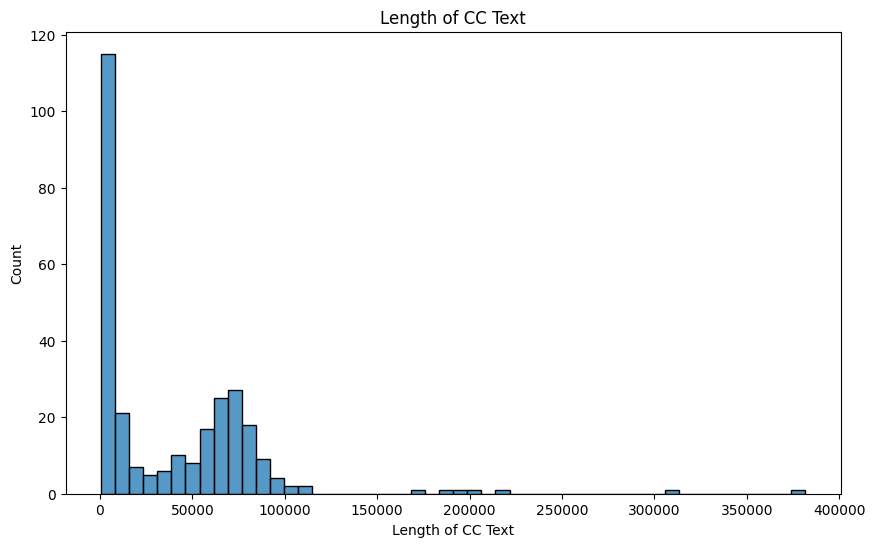

In [62]:
#make a histogram of the length of the text_cc
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['text_cc'].str.len(), bins=50)
plt.title('Length of CC Text')
plt.xlabel('Length of CC Text')
plt.ylabel('Count')
plt.show()

In [74]:
#make text length variable
df['text_length'] = df['text_cc'].str.len()
df['text_length'].describe()

count       283.000000
mean      39870.187279
std       46699.511850
min         502.000000
25%        3903.500000
50%       20651.000000
75%       68876.500000
max      381740.000000
Name: text_length, dtype: float64

In [66]:
#print the shortest text_cc
shortest = df.loc[df['text_length'] == df['text_length'].min()]
print(shortest['text_cc'].values[0])
print(shortest['link'].values[0])

print(shortest['text_length'].values[0])

honor to meet so many amazing people in New Hampshire as we traveled all around your beautiful state and what we saw was that that all of you are so engaged you're so thoughtful you're so you are so deeply caring about the future of this country and we know that's why you're here tonight because you care about our future so first of all I just want to say on behalf of us gratitude to all of you you matter you're important and you're going to send a big message tomorrow so thank you for being here 
https://www.youtube.com/watch?v=06U0r-MdlO0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=20&pp=iAQB0gcJCX4JAYcqIYzv
502


In [67]:
for index, row in df[df['text_length'] < 1000].iterrows():
    print(row['title'])
    print(row['link'])
    print(row['text_length'])
    print('---')

Former presidential candidate Doug Burgum takes the stage in support of President Trump
https://www.youtube.com/watch?v=06U0r-MdlO0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=20&pp=iAQB0gcJCX4JAYcqIYzv
502
---
FULL SPEECH: U.S. Sen. of SC Tim Scott Shares Stage With President Trump - 1/22/24
https://www.youtube.com/watch?v=g9MXqlhPQ1Y&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=21&pp=iAQB0gcJCX4JAYcqIYzv
517
---
Grand Rapids Trump/Vance rally pre-show kicks off with MI-07 congressional candidate Tom Barrett
https://www.youtube.com/watch?v=mbvQxNgCBOw&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=73&pp=iAQB
619
---
Congressman Jack Bergman addresses crowd at Trump/Vance rally in Grand Rapids, MI
https://www.youtube.com/watch?v=uYGJ79uWVTA&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=74&pp=iAQB
745
---
Congressman Bill Huizenga speaks at first Trump/Vance rally in Grand Rapids, Michigan
https://www.youtube.com/watch?v=C-y3-hOIkeY&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=75&pp=

In [75]:
#save the output, one as a csv, but also as a feather, parquet
df.to_csv('Master_DF.csv', index = False)
df.to_feather('Master_DF.feather')
df.to_parquet('Master_DF.parquet')

### Add token data
Add the text_length as the number of tokens


In [132]:
#use open ai tokenizer
import tiktoken
#encoding should be o200k_base
def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

In [133]:
df = pd.read_feather('Master_DF.feather')
df['text_length'] = df['text_cc'].progress_apply(lambda x: num_tokens_from_string(x, 'o200k_base'))
df.head()

100%|██████████| 283/283 [00:03<00:00, 81.13it/s] 


,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event


In [134]:
#save the output, one as a csv, but also as a feather, parquet
df.to_csv('Master_DF.csv', index = False)
df.to_feather('Master_DF.feather')
df.to_parquet('Master_DF.parquet')

### Make date data


In [149]:
df = pd.read_feather('Master_DF.feather')
df.head()

,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event


In [154]:
#turn to date, has format M (can be 1 or 2 digits) D (can be 1 or 2 digits) Y (2 digits)
# Clean up leading/trailing whitespace
df['date_clean'] = df['date'].astype(str).str.strip()
# Now convert
df['datetime'] = pd.to_datetime(df['date_clean'], format='%m/%d/%y', errors='coerce')
#drop date_clean
df.drop(columns = ['date_clean'], inplace = True)
df.head()

,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type,datetime
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event,2024-01-06
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event,2024-01-06
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event,2024-01-05
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event,2024-01-05
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event,2024-01-14


In [155]:
save_output()

# Get Text Features
Now, I will use an LLM to extract features from the text
 - Type of event, location, was it a trump speech, any other speeker
 - What types of campaign promises did he make

In [76]:
df = pd.read_feather('Master_DF.feather')
df.head()

,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,60259
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,112692
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,84673
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,103792
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,217693


## Set Up

In [77]:
import os
import re
import json
import time
from openai import OpenAI
from dotenv import load_dotenv
from tqdm.auto import tqdm


# Configure tqdm for pandas
tqdm.pandas()

# Load environment variables from .env file
load_dotenv()

True

In [78]:

# Access your API key
openai_api_key = os.getenv("OpenAI_Key_CSS")

# Initialize OpenAI client
client = OpenAI(api_key=openai_api_key)

In [81]:
# Function for API calls to OpenAI models
def ask_gpt(prompt, model="gpt-4o", max_tokens=4096, response_format=None, temperature=1, top_p=0):
    """
    Send a prompt to OpenAI API and get a response
    
    Parameters:
    prompt (str): The prompt to send to the model
    model (str): The model to use
    max_tokens (int): Maximum tokens in the response
    response_format (dict, optional): Format for the response (e.g., JSON)
    temperature (float): Temperature for sampling
    top_p (float): Top p for nucleus sampling
    
    Returns:
    str: Model response
    """
    prompt_messages = [
        {
            "role": "user",
            "content": prompt
        }
    ]

    # Only include response_format if it's not None
    kwargs = {
        "model": model,
        "messages": prompt_messages,
        "max_tokens": max_tokens,
        "temperature": temperature,
        "top_p": top_p
    }

    if response_format is not None:
        kwargs["response_format"] = response_format

    try:
        completion = client.chat.completions.create(**kwargs)
        return completion.choices[0].message.content
    except Exception as e:
        print(f"Error with OpenAI API call: {e}")
        return None

In [146]:
def save_output(name = 'Master_DF'):
    """
    Save the DataFrame to CSV, Feather, and Parquet formats.
    
    Parameters:
    name (str): Base name for the output files
    """
    df.to_csv(f'{name}.csv', index=False)
    df.to_feather(f'{name}.feather')
    df.to_parquet(f'{name}.parquet')

## Get standardized info from title
Here, I will use the title to figure out which videos are truley Trump Campaign speeches. 
The prompt should identify the following things
- Is it a Trump Speech
- Are there other people also speaking
- What is the location
- What is the event type? Campaing Rally or something else

In [86]:
prompt_title = '''  
You are a helpful assistant tasked with extracting information from a youtube title. 
You will be given a youtube title, and your job is to figure out whether it is a Trump speech, if there are any other speakers, what the location of the event is, and what the event type is. 

###Title###
{title}

###Instructions###
1. trump_speech: A binary indicator whether the video is a Trump speech (1) or not (0). Beware, it can be a Trump campaing event, yet not a Trump Speech. Code this as yes, if Trump is giving a speech, even if someone else is also giving a speech. However, it is not enough that someone is on the stage with Trump, or that someone is portrayed as giving an event together with Trump, the title must indicate that Trump himself will speak. 
2. other_speaker: A text variable that indicates the name of the other speaker. If there is no other speaker, answer with "None".
3. location: A text variable that indicates the location of the event. If there is no location, answer with "None".
4. event_type: A text variable that indicates the type of event. If it is a Campaing Rally, code it as "Campaing Event", otherwise give the best name you can come up with. 

Return only the answer to those questions in a json format, with the keys "trump_speech", "other_speaker", "location", and "event_type".

'''.strip()

In [87]:
response_format_title = {
    'type': 'json_schema',
    'json_schema': {
        'name': 'youtube_title_info',
        'description': 'Extracts structured information from a YouTube video title related to Trump events',
        'schema': {
            'type': 'object',
            'properties': {
                'trump_speech': {
                    'type': 'integer',
                    'enum': [0, 1],
                    'description': 'Binary indicator of whether the video is a Trump speech (1) or not (0)'
                },
                'other_speaker': {
                    'type': 'string',
                    'description': 'Name of another speaker in the video, or "None" if there is no other speaker'
                },
                'location': {
                    'type': 'string',
                    'description': 'Location of the event, or "None" if not mentioned'
                },
                'event_type': {
                    'type': 'string',
                    'description': 'Type of event (e.g., "Campaign Event", "Press Conference", etc.)'
                }
            },
            'required': ['trump_speech', 'other_speaker', 'location', 'event_type']
        }
    }
}

In [82]:
#get a  subset to test it on, very short and very long text (bottom and top 5 speeches)
sample_df = df[df['text_length'] < 1000].sample(5, random_state = 42)
sample_df = pd.concat([sample_df, df[df['text_length'] > 10000].sample(5, random_state = 42)])
sample_df.head(10)

,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length
19,https://www.youtube.com/watch?v=06U0r-MdlO0&li...,Former presidential candidate Doug Burgum take...,Former presidential candidate Doug Burgum take...,0,06U0r-MdlO0,"[{'duration': 3.76, 'start': 0.04, 'text': 'ho...",honor to meet so many amazing people in New Ha...,502
20,https://www.youtube.com/watch?v=g9MXqlhPQ1Y&li...,FULL SPEECH: U.S. Sen. of SC Tim Scott Shares ...,1/22/24,0,g9MXqlhPQ1Y,"[{'duration': 3.319, 'start': 0.12, 'text': 'T...",Tim Scott South Carolina all right all right a...,517
75,https://www.youtube.com/watch?v=ZbUZ4ZYd4Zs&li...,JD Vance thanks MASSIVE Michigan crowd for the...,JD Vance thanks MASSIVE Michigan crowd for the...,0,ZbUZ4ZYd4Zs,"[{'duration': 2.839, 'start': 0.08, 'text': 'I...",I want to thank you from the bottom of my hear...,509
72,https://www.youtube.com/watch?v=mbvQxNgCBOw&li...,Grand Rapids Trump/Vance rally pre-show kicks ...,07 congressional candidate Tom Barrett,0,mbvQxNgCBOw,"[{'duration': 4.72, 'start': 0.28, 'text': 'I'...",I'm an Iraq war veteran and uh running for con...,619
74,https://www.youtube.com/watch?v=C-y3-hOIkeY&li...,Congressman Bill Huizenga speaks at first Trum...,Congressman Bill Huizenga speaks at first Trum...,0,C-y3-hOIkeY,"[{'duration': 3.839, 'start': 0.04, 'text': 's...",so you may be asking yourself well at least th...,531
255,https://www.youtube.com/watch?v=0P4tqfo4DY0&li...,FULL SPEECH: President Trump Holds a Rally in ...,10/24/24,0,0P4tqfo4DY0,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,40397
216,https://www.youtube.com/watch?v=HEoY_JapW5I&li...,FULL SPEECH: President Trump Participates in a...,10/7/24,0,HEoY_JapW5I,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,18130
251,https://www.youtube.com/watch?v=3W-VcnyUe9A&li...,FULL SPEECH: President Trump Speaks at a Latin...,10/22/24,0,3W-VcnyUe9A,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,58755
62,https://www.youtube.com/watch?v=Osf0GndSCs0&li...,LIVE REPLAY: President Trump Delivers Remarks ...,6/18/24,0,Osf0GndSCs0,"[{'duration': 3.0, 'start': 28.96, 'text': 'e'...",e e e e e e good Tuesday Morning America so go...,381740
151,https://www.youtube.com/watch?v=jFf5bsgmM3o&li...,FULL SPEECH: President Trump Holds a Rally in ...,9/18/24,0,jFf5bsgmM3o,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,66013


In [88]:
sample_df['response_title'] = sample_df['title'].progress_apply(lambda x: ask_gpt(prompt_title.format(title = x), model = "gpt-4o", response_format = response_format_title))

100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


In [90]:
for index, row in sample_df.iterrows():
    print(row['title'])
    print(row['response_title'])
    print('---')

Former presidential candidate Doug Burgum takes the stage in support of President Trump
{"trump_speech":0,"other_speaker":"Doug Burgum","location":"None","event_type":"Support Event"}
---
FULL SPEECH: U.S. Sen. of SC Tim Scott Shares Stage With President Trump - 1/22/24
{"trump_speech":0,"other_speaker":"Tim Scott","location":"None","event_type":"None"}
---
JD Vance thanks MASSIVE Michigan crowd for their support during first ever Trump/Vance rally
{"trump_speech":0,"other_speaker":"JD Vance","location":"Michigan","event_type":"Campaign Event"}
---
Grand Rapids Trump/Vance rally pre-show kicks off with MI-07 congressional candidate Tom Barrett
{"trump_speech":0,"other_speaker":"Tom Barrett","location":"Grand Rapids","event_type":"Campaign Event"}
---
Congressman Bill Huizenga speaks at first Trump/Vance rally in Grand Rapids, Michigan
{"trump_speech":0,"other_speaker":"Congressman Bill Huizenga","location":"Grand Rapids, Michigan","event_type":"Campaign Event"}
---
FULL SPEECH: Preside

Seems to work well, so lets scale it up

In [91]:
df['response_title'] = df['title'].progress_apply(lambda x: ask_gpt(prompt_title.format(title = x), model = "gpt-4o", response_format = response_format_title))

100%|██████████| 283/283 [05:38<00:00,  1.20s/it]


In [180]:
#turn response to var
def unpack_response(row, varname = 'response_title'):
    try:
        response_dict = json.loads(row[varname])
        return pd.Series(response_dict)
    except (TypeError, json.JSONDecodeError):
        return pd.Series()

df = pd.concat([df, df.progress_apply(unpack_response, axis=1)], axis=1)

df.head()

100%|██████████| 283/283 [00:00<00:00, 11194.62it/s]


,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type,datetime,trump_speech,other_speaker,location,event_type
0,https://www.youtube.com/watch?v=0npi0hevtKg&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,0npi0hevtKg,"[{'duration': 15.41, 'start': 0.1, 'text': '[M...",[Music] [Applause] [Music] [Applause] we each ...,12443,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Clinton, Iowa",Campaign Event,2024-01-06,1,None,"Clinton, Iowa",Campaign Event
1,https://www.youtube.com/watch?v=DxTdbVGUz14&li...,FULL SPEECH: Trump to Deliver Remarks at Iowa ...,1/6/24,0,DxTdbVGUz14,"[{'duration': 10.2, 'start': 0.08, 'text': 'pl...",please welcome the next president of the Unite...,22982,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Newton, Iowa",Campaign Event,2024-01-06,1,None,"Newton, Iowa",Campaign Event
2,https://www.youtube.com/watch?v=Cp76BvgKfZg&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,Cp76BvgKfZg,"[{'duration': 10.28, 'start': 0.359, 'text': '...",please welcome the next president of the Unite...,17323,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Mason City,Campaign Event,2024-01-05,1,None,Mason City,Campaign Event
3,https://www.youtube.com/watch?v=dw3ZDAAy_Y0&li...,FULL SPEECH: Trump to speak at IA Commit to Ca...,1/5/24,0,dw3ZDAAy_Y0,"[{'duration': 9.48, 'start': 0.28, 'text': 'pl...",please welcome the next president of the Unite...,21046,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,Sioux Center,Campaign Event,2024-01-05,1,None,Sioux Center,Campaign Event
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event,2024-01-14,1,None,"Indianola, Iowa",Campaign Event


In [109]:
#inspect the data

df[['title', 'link', 'trump_speech', 'other_speaker', 'location', 'event_type']].sample(10, random_state = 123).to_clipboard()


Good overall. There are some speeches where it is not just trump, for example at a press confrence (row three) or at a round table (row 7). Also one case (row 2) where someone else gives some short remarks too. But gets same answers as I would based on title, and the speeches are still mainly Trump, with the others being just a fraction. Row based on no title row

In [ ]:
save_output()

### EDA

In [135]:
df = pd.read_feather('Master_DF.feather')

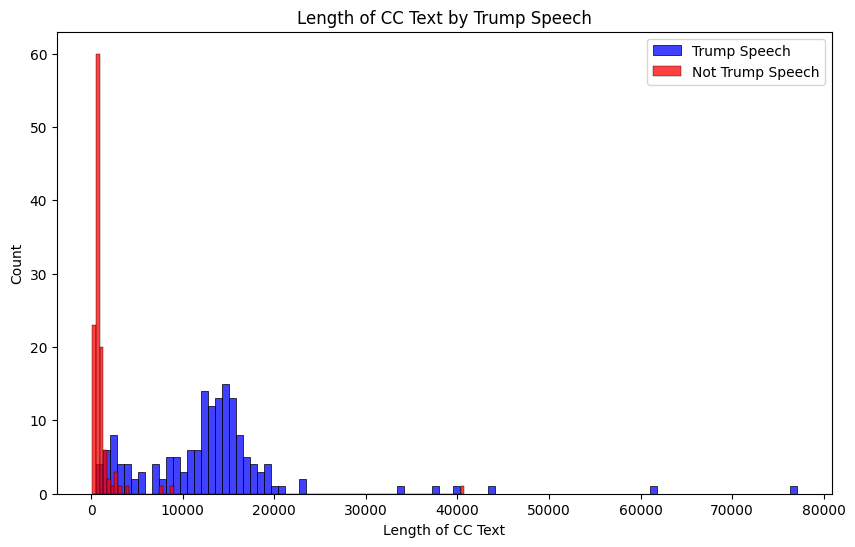

In [136]:
#compare length histogram when it is a Trump speech and when it is not
plt.figure(figsize=(10, 6))
sns.histplot(df[df['trump_speech'] == 1]['text_length'], bins=100, color='blue', label='Trump Speech')
sns.histplot(df[df['trump_speech'] == 0]['text_length'], bins=100, color='red', label='Not Trump Speech')
plt.title('Length of CC Text by Trump Speech')
plt.xlabel('Length of CC Text')
plt.ylabel('Count')
plt.legend()
plt.show()

As expected, most of the really short ones, are actually not trump speeches. Lets look at the short trump speeches, as well as the long not trump speech to figure out if there is some misclassification

In [139]:
#loop over the 5 shortest rows where trump_speech = 1
for index, row in df[(df['text_length'] < 1000) & (df['trump_speech'] == 1)].iterrows():
    print(row['title'])
    print(row['link'])
    print(row['text_length'])
    print('---')

FULL SPEECH: President Trump Holds a Rally in Waterford Township, MI - 2/17/24
https://www.youtube.com/watch?v=LxXARrz0gBc&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=33&pp=iAQB
920
---
FULL SPEECH: President Trump Gives Remarks to the Press in D.C. - 6/13/24
https://www.youtube.com/watch?v=UrT9fh3GeDg&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=60&pp=iAQB0gcJCX4JAYcqIYzv
929
---
ALTERNATE ANGLE: ASSASSINATION ATTEMPT FORCES TRUMP OFF STAGE AT RALLY IN BUTLER, PA - 7/13/24
https://www.youtube.com/watch?v=m5NBC4ijymw&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=70&pp=iAQB
508
---


Has a false possitive, the alternate angle of the assassination attempt. But not costly
Other two are actually short exerpts of speeches

Now lets look at the long ones that are not trump speeches

In [142]:
#loop over the 5 shortest rows where trump_speech = 1
for index, row in df[(df['text_length'] > 8000) & (df['trump_speech'] == 0)].iterrows():
    print(row['title'])
    print(row['link'])
    print(row['video_id'])
    print(row['text_length'])
    print('---')

FULL INTERVIEW: Super Tuesday Preview Special with President Trump at Mar-a-Lago - 3/4/24
https://www.youtube.com/watch?v=7MMyGcVH7Ik&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=40&pp=iAQB
7MMyGcVH7Ik
8814
---
WATCH: RSBN’s Full Coverage of the Assassination Attempt on President Trump - 7/13/24
https://www.youtube.com/watch?v=c3TKCJ7aE44&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=71&pp=iAQB
c3TKCJ7aE44
40743
---


One mistake, the long one is an interview with Trump, should probably change that to be a trump speech, as he is being interviewed an has the majority of talking time. 

In [143]:
#for this video_id (7MMyGcVH7Ik) turn the trump_speech to 1
df.loc[df['video_id'] == '7MMyGcVH7Ik', 'trump_speech'] = 1

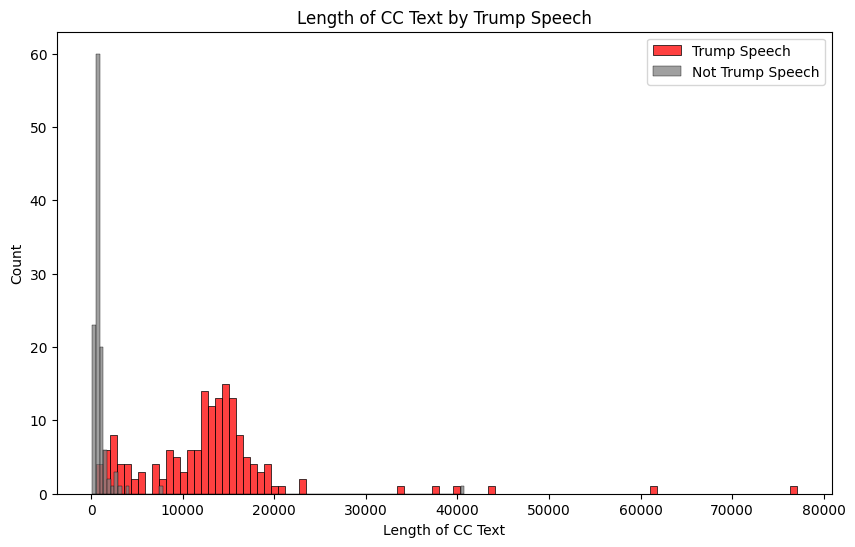

In [145]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['trump_speech'] == 1]['text_length'], bins=100, color='red', label='Trump Speech')
sns.histplot(df[df['trump_speech'] == 0]['text_length'], bins=100, color='gray', label='Not Trump Speech')
plt.title('Length of CC Text by Trump Speech')
plt.xlabel('Length of CC Text')
plt.ylabel('Count')
plt.legend()
plt.show()

In [147]:
save_output()

In [148]:
#who are teh most common speakers
df['other_speaker'].value_counts()

other_speaker
None                   157
JD Vance                 4
Sean Parnell             3
Kamala                   3
Tom Barrett              3
                      ... 
Edward Romaine           1
Scott LoBaido            1
Gov. Sarah Sanders       1
Michael J. McDonald      1
Tucker Carlson           1
Name: count, Length: 104, dtype: int64

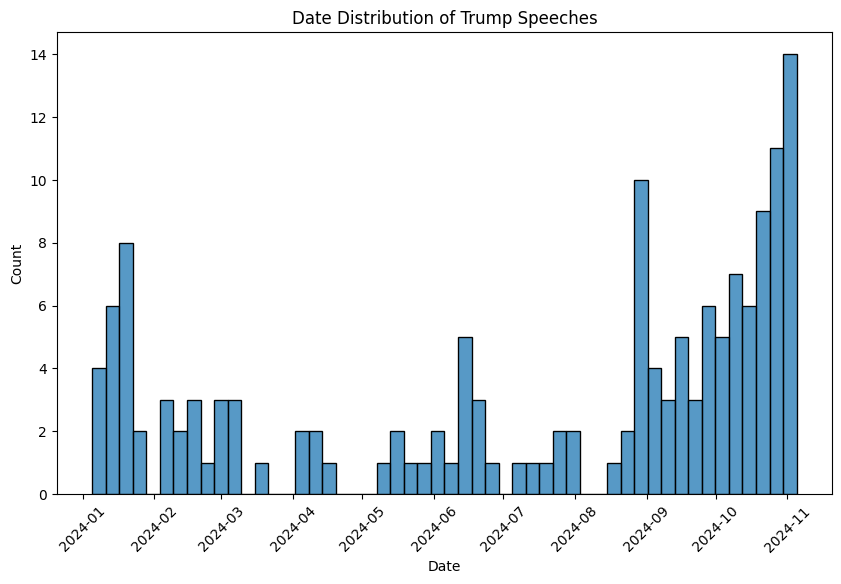

In [162]:
#look at date distribution
plt.figure(figsize=(10, 6))
sns.histplot(df[df['trump_speech'] == 1]['datetime'], bins=52)
plt.title('Date Distribution of Trump Speeches')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [165]:
#look at the most recent events
for index, row in df[df['datetime'] > '2024-11-01'].iterrows():
    print(row['date'])
    print(row['link'])
    print(row['title'])
    print(row['trump_speech'])


    print('---')

 11/2/24
https://www.youtube.com/watch?v=r5OBIUebLt0&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=274&pp=iAQB0gcJCX4JAYcqIYzv
FULL SPEECH: President Trump Holds a Rally in Gastonia, NC - 11/2/24
1
---
 11/2/24
https://www.youtube.com/watch?v=upUVZxAhyKk&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=275&pp=iAQB
FULL SPEECH: President Trump Holds a Rally in Salem, VA - 11/2/24
1
---
 11/3/24
https://www.youtube.com/watch?v=TWmzOh116i8&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=276&pp=iAQB
FULL SPEECH: President Trump Holds a Rally in Lititz, PA - 11/3/24
1
---
 11/3/24
https://www.youtube.com/watch?v=VVw4t2V2-jw&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=278&pp=iAQB
FULL SPEECH: President Trump Holds a Rally in Macon, GA - 11/3/24
1
---
 11/4/24
https://www.youtube.com/watch?v=bDLRpZGcGIs&list=PLuXXbBFpPc0mS8UHQwbnmhgHSu9oFxnXJ&index=279&pp=iAQB
FULL SPEECH: President Trump Holds a Rally in Raleigh, NC - 11/4/24
1
---
 11/4/24
https://www.youtube.com/watch?v=rdmsHossn4M&list=PLuXX

Should probs cut off at election, but not even sure if I have to. Still kinda campaing promises. 

In [166]:
df['event_type'].value_counts()

event_type
Campaign Event                                                    182
Press Conference                                                   18
Remarks                                                            12
Town Hall                                                           7
Trump Event                                                         7
Speech                                                              6
Latino Roundtable                                                   4
Speech Event                                                        3
Roundtable                                                          3
Endorsement Announcement                                            2
Convention                                                          2
National Guard Event                                                2
Announcement                                                        1
National Summit                                                     1
Address t

## Get Campaign Promises
Next, I will test with getting the campaing promises from the transcription text. 
for that I will need to: 
 - Put the speech into chunks that are not too long
 - Figure out a good prompt to get the campaign promises (and maybe also the big issues they are talking about)
 - Figure out how I can best store all Campaign Promises, and Link them back to the text
 - Figure out what Sample I want to run it on. 

In [170]:
#what is the general sample I for sure care about? Trump speech and a campaign event
sample_large = df[(df['trump_speech'] == 1) & (df['event_type'] == 'Campaign Event')]
print(sample_large.shape)
#short sample to test
sample_short = sample_large.sample(3, random_state = 123)
sample_short.head()


(88, 14)


,link,title,date,multiple,video_id,cc_transcript,text_cc,text_length,response_title,trump_speech,other_speaker,location,event_type,datetime
4,https://www.youtube.com/watch?v=hxX4Fnsrke0&li...,LIVE REPLAY: Trump Delivers Remarks at Caucus ...,1/14/24,0,hxX4Fnsrke0,"[{'duration': 5.2, 'start': 236.48, 'text': 'h...",happy Sunday we are live here in Indianola Iow...,44041,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Indianola, Iowa",Campaign Event,2024-01-14
278,https://www.youtube.com/watch?v=bDLRpZGcGIs&li...,FULL SPEECH: President Trump Holds a Rally in ...,11/4/24,0,bDLRpZGcGIs,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,15038,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Raleigh, NC",Campaign Event,2024-11-04
218,https://www.youtube.com/watch?v=7eK2z33_VRI&li...,FULL SPEECH: President Trump ​H​olds a Rally i...,10/9/24,0,7eK2z33_VRI,"[{'duration': 5.081, 'start': 1.439, 'text': '...",hi folks rsbn founder and CEO Joe seals here d...,13592,"{""trump_speech"":1,""other_speaker"":""None"",""loca...",1,None,"Reading, PA",Campaign Event,2024-10-09


In [194]:
prompt_campaing_promises = '''  
You are a helpful assistant tasked with extracting campaing promises from the transcripts of a campaing event. The text is based on youtube closed captions of a chunk of the event, so there is some noise in the sense that the text is not neccessarily percise and clean. But it should still be possible to extract the key arguments from it. 

###Text###
{transcript}

###Instructions###
Your job is to extract all the campaing promises from the text. That is, during his campaing, Trump focused on very specific issues that he wants to tackle, your job is to extract those issues and promises. 
For that, extract every single promise, give me both the explanation of what the promise is about, as well as a short excerpt of the text that your decision is based on. 

For each campaing promise/claim, return a dictionary with the following
- The key is promise_1 for the first, promise_2 for the second, etc.
- The value is a dictionary with the following:
    - "Label": A short label for the promise, this should be as high level as possible
    - "Description": A short text description with the campaing promise
    - "Excerpt": An excerpt of the text that your decision is based on. This excerpt should be exactly as in the orignial text, and can have misspellings or obviously erroronous words, as long as it is exactly as in the original text. 
    - "Issue": A short text describing the issue that the promise is tackling
    - "Importance": A number between 0 and 10 that indicates how important the issue was made out to be during the speech. 

Return only the answer to those questions in a json format, with the keys "promise_1", "promise_2", etc.

'''.strip()

In [188]:
response_format_promises = {
    'type': 'json_schema',
    'json_schema': {
        'name': 'campaign_promises',
        'description': 'Extracts campaign promises from a transcript of a campaign event',
        'schema': {
            'type': 'object',
            'properties': {},  # Required for OpenAI compatibility
            'patternProperties': {
                '^promise_\\d+$': {
                    'type': 'object',
                    'properties': {
                        'Label': {
                            'type': 'string',
                            'description': 'A short, high-level label for the campaign promise'
                        },
                        'Description': {
                            'type': 'string',
                            'description': 'A concise description of the campaign promise'
                        },
                        'Excerpt': {
                            'type': 'string',
                            'description': 'A relevant excerpt from the transcript supporting the promise'
                        },
                        'Issue': {
                            'type': 'string',
                            'description': 'The political or social issue the promise addresses'
                        },
                        'Importance': {
                            'type': 'integer',
                            'minimum': 0,
                            'maximum': 10,
                            'description': 'An importance score based on how central the issue was to the speech'
                        }
                    },
                    'required': ['Label', 'Description', 'Excerpt', 'Issue', 'Importance']
                }
            },
            'additionalProperties': False
        }
    }
}

In [190]:
sample_short['text_cc_response_p2'] = sample_short['text_cc'].progress_apply(lambda x: ask_gpt(prompt_campaing_promises.format(transcript = x), model = "gpt-4o", response_format = response_format_promises))

100%|██████████| 3/3 [00:33<00:00, 11.03s/it]


In [191]:
sample_short['text_cc_response_p2'].iloc[0]

'{"promise_1":{"Label":"Secure the Border","Description":"Trump promises to seal the border and shut down the invasion of the country, emphasizing the need for strong border security.","Excerpt":"\\"I will seal the border and I will shut down the invasion of our country.\\"","Issue":"Border security and immigration control","Importance":10},"promise_2":{"Label":"Energy Independence","Description":"Trump pledges to restore energy independence by drilling and utilizing domestic energy resources.","Excerpt":"\\"Drill baby drill, we\'re going to drill baby drill.\\"","Issue":"Energy independence and economic stability","Importance":9},"promise_3":{"Label":"Economic Revival","Description":"Trump promises to end Biden\'s inflation nightmare and rescue the economy, focusing on reducing inflation and boosting economic growth.","Excerpt":"\\"I will end Joe Biden\'s inflation nightmare, rescue our economy.\\"","Issue":"Inflation and economic growth","Importance":8},"promise_4":{"Label":"Tax Cuts

Issue is: How can I efficiently extract all claims, standardize them, and get an understanding for how important each of the topics are in relation to each other? Will start trying it bottom up, but might need to turn it into a top down approach

In [192]:
import pandas as pd
import json

# Sample DataFrame structure:
# df = pd.DataFrame({
#     'video_id': ['abc123', 'def456'],
#     'promises_json': [json_string_1, json_string_2]  # JSON strings from your LLM output
# })

# Flatten function
def flatten_promises(row):
    video_id = row['video_id']
    promises_data = json.loads(row['text_cc_response_p2'])  
    flattened_rows = []
    for promise_key, promise_values in promises_data.items():
        flattened_rows.append({
            'video_id': video_id,
            'Label': promise_values['Label'],
            'Description': promise_values['Description'],
            'Excerpt': promise_values['Excerpt'],
            'Issue': promise_values['Issue'],
            'Importance': promise_values['Importance']
        })
    return flattened_rows

# Apply to all rows and flatten the result
flattened_data = []
for _, row in sample_short.iterrows():
    flattened_data.extend(flatten_promises(row))

# Create the new DataFrame
promises_df = pd.DataFrame(flattened_data)

# Show the final result
promises_df.head()

,video_id,Label,Description,Excerpt,Issue,Importance
0,hxX4Fnsrke0,Secure the Border,Trump promises to seal the border and shut dow...,"""I will seal the border and I will shut down t...",Border security and immigration control,10
1,hxX4Fnsrke0,Energy Independence,Trump pledges to restore energy independence b...,"""Drill baby drill, we're going to drill baby d...",Energy independence and economic stability,9
2,hxX4Fnsrke0,Economic Revival,Trump promises to end Biden's inflation nightm...,"""I will end Joe Biden's inflation nightmare, r...",Inflation and economic growth,8
3,hxX4Fnsrke0,Tax Cuts,Trump commits to making the Trump tax cuts per...,"""I will make the Trump tax cuts permanent and ...",Taxation and economic relief,7
4,hxX4Fnsrke0,Deportation Operation,Trump plans to begin the largest deportation o...,"""Begin the largest deportation operation in Am...",Illegal immigration,8


In [193]:
promises_df.to_clipboard()

### Cost Analysis
Now that we know it kinda works, lets see how much it would cost to run this prompt on the whole dataset. 